<a href="https://colab.research.google.com/github/trifarameliniaa/SKRIPSI/blob/main/file%20skripsinya%20fara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [1]:
from PIL import Image

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

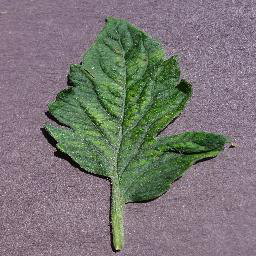

In [3]:
img = Image.open('/content/Tomato_Tomato_mosaic_virus15.jpg')
img

In [53]:
img.size

(256, 256)

In [5]:
img_array = np.array(img)
img_array

array([[[146, 127, 146],
        [140, 121, 140],
        [135, 116, 135],
        ...,
        [125, 110, 129],
        [160, 145, 164],
        [148, 133, 152]],

       [[140, 121, 140],
        [145, 126, 145],
        [147, 128, 147],
        ...,
        [118, 103, 122],
        [139, 124, 143],
        [140, 125, 144]],

       [[139, 120, 139],
        [135, 116, 135],
        [131, 112, 131],
        ...,
        [130, 115, 134],
        [146, 131, 150],
        [146, 131, 150]],

       ...,

       [[154, 134, 146],
        [116,  96, 108],
        [150, 130, 142],
        ...,
        [135, 117, 133],
        [134, 116, 132],
        [132, 114, 130]],

       [[118,  98, 110],
        [138, 118, 130],
        [135, 115, 127],
        ...,
        [129, 111, 127],
        [128, 110, 126],
        [128, 110, 126]],

       [[107,  87,  99],
        [119,  99, 111],
        [155, 135, 147],
        ...,
        [140, 122, 138],
        [141, 123, 139],
        [145, 127, 143]]

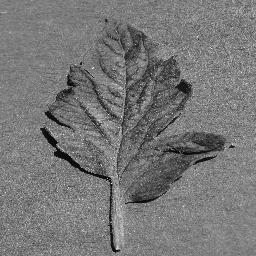

In [6]:
imgGray = img.convert('L')
imgGray.save('test_gray.jpg')
imgGray

In [13]:
imgG_array = np.array(imgGray)
imgG_array

array([[135, 129, 124, ..., 117, 152, 140],
       [129, 134, 136, ..., 110, 131, 132],
       [128, 124, 120, ..., 122, 138, 138],
       ...,
       [141, 103, 137, ..., 124, 123, 121],
       [105, 125, 122, ..., 118, 117, 117],
       [ 94, 106, 142, ..., 129, 130, 134]], dtype=uint8)

In [8]:
np.min(imgG_array),np.max(imgG_array)

(0, 247)

## FIS (Fuzzy Information System)

Pada bagian ini meliputi: 
- Representasi citra grayscale ke dalam fungsi keanggotaan fuzzy
- Mengkuantifikasi ketidakpastian yang dihasilkan akibat kekurangan informasi menggunakan entropi

## MF linier naik

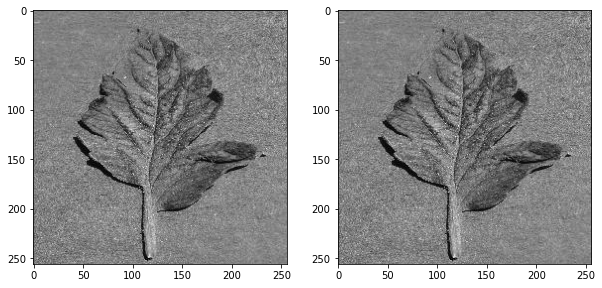

In [54]:
def fungsi_linier(x):
  a = -0.01;
  b = 247.1;
  miu = (x - a)/(b-a)
  return miu

plt.figure(figsize=(10,5))
plt.gray()
plt.subplot(121)
plt.imshow(imgG_array/256)
plt.subplot(122)
plt.imshow(fungsi_linier(imgG_array/256))
plt.show()

In [55]:
img_fuzzy = fungsi_linier(imgG_array)
img_fuzzy

array([[0.54635587, 0.52207519, 0.50184129, ..., 0.47351382, 0.61515115,
        0.56658978],
       [0.52207519, 0.54230909, 0.55040265, ..., 0.44518635, 0.53016875,
        0.53421553],
       [0.51802841, 0.50184129, 0.48565416, ..., 0.49374772, 0.55849622,
        0.55849622],
       ...,
       [0.57063656, 0.41685889, 0.55444944, ..., 0.50184129, 0.4977945 ,
        0.48970094],
       [0.42495245, 0.50588807, 0.49374772, ..., 0.4775606 , 0.47351382,
        0.47351382],
       [0.38043786, 0.42899923, 0.57468334, ..., 0.52207519, 0.52612197,
        0.54230909]])

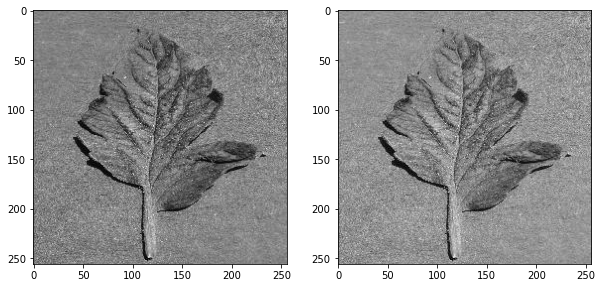

In [56]:
def entropi(x):
  e = -(x)*np.log2(x)
  return e

plt.figure(figsize=(10,5))
plt.gray()
plt.subplot(121)
plt.imshow(img_fuzzy/256)
plt.subplot(122)
plt.imshow(entropi(img_fuzzy/256))
plt.show()

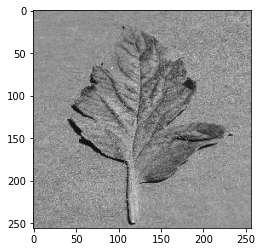

In [57]:
fig = plt.imshow(entropi(img_fuzzy/256))

In [33]:
def entropi(x):
  e = -(x)*np.log2(x)
  return e

In [73]:
FEM = entropi(img_fuzzy)/256
FEM

array([[0.00186121, 0.00191224, 0.00194992, ..., 0.0019949 , 0.00168443,
        0.00181402],
       [0.00191224, 0.00187015, 0.00185211, ..., 0.00203033, 0.00189593,
        0.0018875 ],
       [0.00192014, 0.00194992, 0.00197676, ..., 0.00196372, 0.0018334 ,
        0.0018334 ],
       ...,
       [0.00180409, 0.00205558, 0.00184283, ..., 0.00194992, 0.00195691,
        0.00197033],
       [0.00204944, 0.00194275, 0.00196372, ..., 0.00198905, 0.0019949 ,
        0.0019949 ],
       [0.002072  , 0.00204605, 0.001794  , ..., 0.00191224, 0.00190417,
        0.00187015]])

In [72]:
maxcr = np.max(FEM)
mincr = np.min(FEM)
avgcr = (maxcr + mincr)/2
print(maxcr, mincr, avgcr)

0.5307375028213426 0.000583708910191957 0.2656606058657673


In [ ]:
FEM.shape, FEM.dtype

((256, 256), dtype('float64'))

## MF segitiga dan linier


## MF Sigmoid

In [ ]:
def sig(x,a,b,c):
    if x < a:
      miu = 0
    elif a < x < b:
      miu =  2. * ((x - a)** 2. / (b - a)) ** 2.
    elif b < x < c:
      miu = 1 - 2. * ((x - b) / (b - a)) ** 2.
    else:
      miu = 1
    return miu

In [ ]:
sig(2,1,5,7)

0.125

In [ ]:
def sigf(x,a,b,c):
    if x <= a:
      miu = 0
    elif a <= x <= b:
      miu =  (x - a)**2 / ((b - a)*(c - a))
    elif b <= x <= c:
      miu = 1 - ((x - c)**2) /(c - b)*(c - a)
    else:
      miu = 1
    return miu

In [ ]:
sigf(6,1,5,6)

1.0

# K-Means Klastering

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

In [76]:
image = cv2.imread('/content/Screenshot 2022-07-29 at 20.32.39.png')
print(image.dtype, image.shape)

uint8 (434, 434, 3)


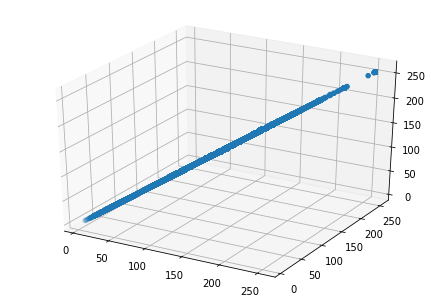

In [83]:
r, g, b = cv2.split(image)
r = r.flatten()
g = g.flatten()
b = b.flatten()#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [85]:
pixel_vals = fig.reshape((-1,2))
print(pixel_vals.dtype, pixel_vals.shape)

AttributeError: ignored

In [86]:
Z = np.float32(pixel_vals)
print(Z.dtype, Z.shape)

NameError: ignored

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
print(label)

[[1]
 [0]
 [0]
 ...
 [1]
 [2]
 [2]]


In [ ]:
print(center)

[[ 74.90644  74.90644  74.90644]
 [149.93405 149.93405 149.93405]
 [124.82388 124.82388 124.82388]]


In [ ]:
center = np.uint8(center)
center

array([[ 74,  74,  74],
       [149, 149, 149],
       [124, 124, 124]], dtype=uint8)

In [ ]:
segmented_data = center[label.flatten()]
segmented_data

array([[149, 149, 149],
       [ 74,  74,  74],
       [ 74,  74,  74],
       ...,
       [149, 149, 149],
       [124, 124, 124],
       [124, 124, 124]], dtype=uint8)

In [ ]:
segmented_image = segmented_data.reshape((image.shape))
segmented_image

array([[[149, 149, 149],
        [ 74,  74,  74],
        [ 74,  74,  74],
        ...,
        [ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74]],

       [[ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74],
        ...,
        [ 74,  74,  74],
        [ 74,  74,  74],
        [ 74,  74,  74]],

       [[ 74,  74,  74],
        [ 74,  74,  74],
        [124, 124, 124],
        ...,
        [149, 149, 149],
        [124, 124, 124],
        [149, 149, 149]],

       ...,

       [[124, 124, 124],
        [ 74,  74,  74],
        [ 74,  74,  74],
        ...,
        [149, 149, 149],
        [149, 149, 149],
        [149, 149, 149]],

       [[124, 124, 124],
        [ 74,  74,  74],
        [124, 124, 124],
        ...,
        [149, 149, 149],
        [149, 149, 149],
        [149, 149, 149]],

       [[124, 124, 124],
        [ 74,  74,  74],
        [124, 124, 124],
        ...,
        [149, 149, 149],
        [124, 124, 124],
        [124, 124, 124]]

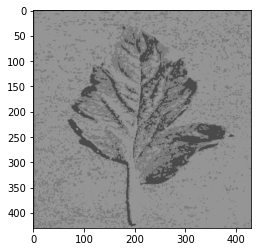

In [ ]:
plt.imshow(segmented_image)

In [ ]:
from PIL import Image
im = Image.fromarray(segmented_image)
im.save("outfile.jpeg")

# Evaluasi Performa 

In [ ]:
# PNSR (Peak Signal to Noise Ratio)
from math import log10, sqrt

def PSNR(original, compressed):
	mse = np.mean((original - compressed) ** 2)
	if(mse == 0): 
		return 100
	max_pixel = 255.0
	psnr = 20 * log10(max_pixel / sqrt(mse))
	return psnr

def main():
	original = cv2.imread("/content/Tomato_Tomato_mosaic_virus15.jpg")
	compressed = cv2.imread("/content/outfile.jpeg", 1)
	value = PSNR(original, compressed)
	print(f"PSNR value is {value} dB")
	
if __name__ == "__main__":
	main()

ValueError: ignored